In [2]:
import pandas as pd
import os

In [4]:
csv_path = '../data/csv/monthly_capacity_wind_solar_public_release_file.csv'


In [8]:
df = pd.read_csv(csv_path)
df.head()

,Month,Year,Country or region,Country code,Source,Unit,Installed Capacity,Capacity additions (month-on-month),Capacity additions (year-to-date)
0,1.0,2016.0,Argentina,ARG,Solar,GWAC,0.01,0.0,0.0
1,2.0,2016.0,Argentina,ARG,Solar,GWAC,0.01,0.0,0.0
2,3.0,2016.0,Argentina,ARG,Solar,GWAC,0.01,0.0,0.0
3,4.0,2016.0,Argentina,ARG,Solar,GWAC,0.01,0.0,0.0
4,5.0,2016.0,Argentina,ARG,Solar,GWAC,0.01,0.0,0.0


In [10]:
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

# Create a new 'Date' column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')
df.head()

,Month,Year,Country or region,Country code,Source,Unit,Installed Capacity,Capacity additions (month-on-month),Capacity additions (year-to-date),Date
0,1,2016,Argentina,ARG,Solar,GWAC,0.01,0.0,0.0,2016-01-01
1,2,2016,Argentina,ARG,Solar,GWAC,0.01,0.0,0.0,2016-02-01
2,3,2016,Argentina,ARG,Solar,GWAC,0.01,0.0,0.0,2016-03-01
3,4,2016,Argentina,ARG,Solar,GWAC,0.01,0.0,0.0,2016-04-01
4,5,2016,Argentina,ARG,Solar,GWAC,0.01,0.0,0.0,2016-05-01


In [13]:
df = df.drop(columns=['Month', 'Year'])
df.head()

,Country or region,Country code,Source,Unit,Installed Capacity,Capacity additions (month-on-month),Capacity additions (year-to-date),Date
0,Argentina,ARG,Solar,GWAC,0.01,0.0,0.0,2016-01-01
1,Argentina,ARG,Solar,GWAC,0.01,0.0,0.0,2016-02-01
2,Argentina,ARG,Solar,GWAC,0.01,0.0,0.0,2016-03-01
3,Argentina,ARG,Solar,GWAC,0.01,0.0,0.0,2016-04-01
4,Argentina,ARG,Solar,GWAC,0.01,0.0,0.0,2016-05-01


In [14]:
df['Country or region'].unique()

array(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Chile', 'China',
       'Germany', 'Denmark', 'Spain', 'Finland', 'France',
       'United Kingdom', 'India', 'Italy', 'Japan', 'South Korea',
       'Netherlands', 'New Zealand', 'The Philippines', 'Poland',
       'Portugal', 'Türkiye', 'Taiwan', 'United States', 'South Africa'],
      dtype=object)

In [15]:
df = df[df['Date'].dt.year.isin([2022, 2023, 2024])]
df.head()

,Country or region,Country code,Source,Unit,Installed Capacity,Capacity additions (month-on-month),Capacity additions (year-to-date),Date
72,Argentina,ARG,Solar,GWAC,0.82,0.00,0.00,2022-01-01
73,Argentina,ARG,Solar,GWAC,0.82,0.00,0.00,2022-02-01
74,Argentina,ARG,Solar,GWAC,0.82,0.00,0.00,2022-03-01
75,Argentina,ARG,Solar,GWAC,0.82,0.00,0.00,2022-04-01
76,Argentina,ARG,Solar,GWAC,0.83,0.01,0.01,2022-05-01


In [21]:
df['Month'] = df['Date'].dt.month
df.head()

,Country or region,Country code,Source,Unit,Installed Capacity,Capacity additions (month-on-month),Capacity additions (year-to-date),Date,Month
72,Argentina,ARG,Solar,GWAC,0.82,0.00,0.00,2022-01-01,1
73,Argentina,ARG,Solar,GWAC,0.82,0.00,0.00,2022-02-01,2
74,Argentina,ARG,Solar,GWAC,0.82,0.00,0.00,2022-03-01,3
75,Argentina,ARG,Solar,GWAC,0.82,0.00,0.00,2022-04-01,4
76,Argentina,ARG,Solar,GWAC,0.83,0.01,0.01,2022-05-01,5


In [17]:
df_source_sum_monthly = df.groupby(['Month','Source'])['Installed Capacity'].sum().unstack(fill_value=0)
df_source_sum_monthly.head()


Source,Solar,Wind,Wind Offshore,Wind Onshore
Month,,,,
1,6466.40,2492.16,92.30,884.05
2,6592.57,2510.79,92.43,887.00
3,6683.40,2506.64,93.41,860.26
4,6852.34,2552.38,94.24,895.49
5,6993.14,2559.93,95.05,898.96


In [ ]:
total_monthly_capacity = df.groupby(['Month'])['Installed Capacity'].sum()
total_monthly_capacity.head()


Month  Date      
1      2022-01-01    2687.53
       2023-01-01    3196.88
       2024-01-01    4050.50
2      2022-02-01    2709.97
       2023-02-01    3246.03
Name: Installed Capacity, dtype: float64

In [26]:
total_monthly_capacity = df.groupby(df['Date'].dt.month).agg(
    Date=('Date', 'first'), # Takes the first date encountered for that month
    Total_Installed_Capacity=('Installed Capacity', 'sum')).reset_index(drop=True)
total_monthly_capacity


,Date,Total_Installed_Capacity
0,2022-01-01,9934.91
1,2022-02-01,10082.79
2,2022-03-01,10143.71
3,2022-04-01,10394.45
4,2022-05-01,10547.08
5,2022-06-01,10732.94
6,2022-07-01,10932.36
7,2022-08-01,11089.72
8,2022-09-01,11266.91
9,2022-10-01,11442.18


<Axes: >

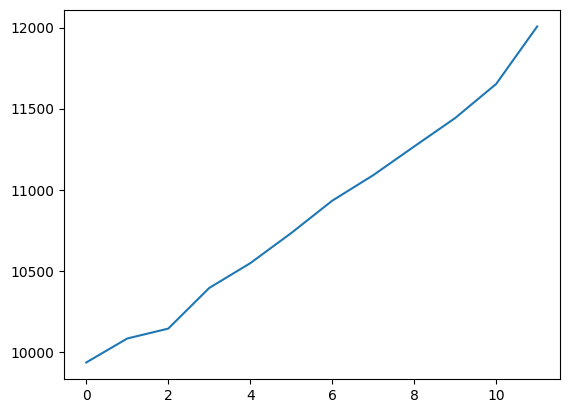

In [25]:
total_monthly_capacity['Total_Installed_Capacity'].plot()

In [ ]:
df.head()


,Country or region,Country code,Source,Unit,Installed Capacity,Capacity additions (month-on-month),Capacity additions (year-to-date),Date,Month
72,Argentina,ARG,Solar,GWAC,0.82,0.00,0.00,2022-01-01,1
73,Argentina,ARG,Solar,GWAC,0.82,0.00,0.00,2022-02-01,2
74,Argentina,ARG,Solar,GWAC,0.82,0.00,0.00,2022-03-01,3
75,Argentina,ARG,Solar,GWAC,0.82,0.00,0.00,2022-04-01,4
76,Argentina,ARG,Solar,GWAC,0.83,0.01,0.01,2022-05-01,5


<Axes: >

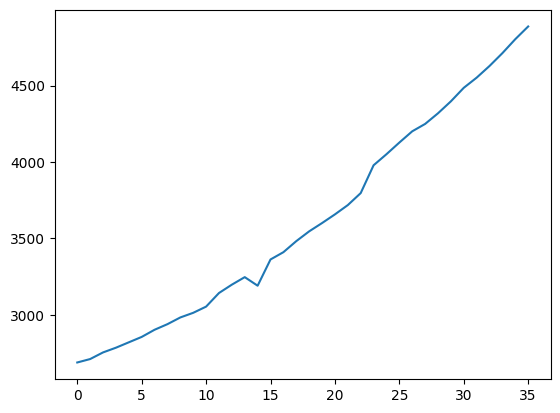

In [35]:
monthly_total_capacity_per_year = df.groupby('Date')['Installed Capacity'].sum().reset_index()
monthly_total_capacity_per_year['Installed Capacity'].plot()

In [36]:
monthly_total_capacity_per_year.head()

,Date,Installed Capacity
0,2022-01-01,2687.53
1,2022-02-01,2709.97
2,2022-03-01,2753.35
3,2022-04-01,2784.14
4,2022-05-01,2819.48
